<a href="https://colab.research.google.com/github/PrajwalUnaik/100daysofcode__python/blob/main/Exercises%20Day%2013-15%20-%20Time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

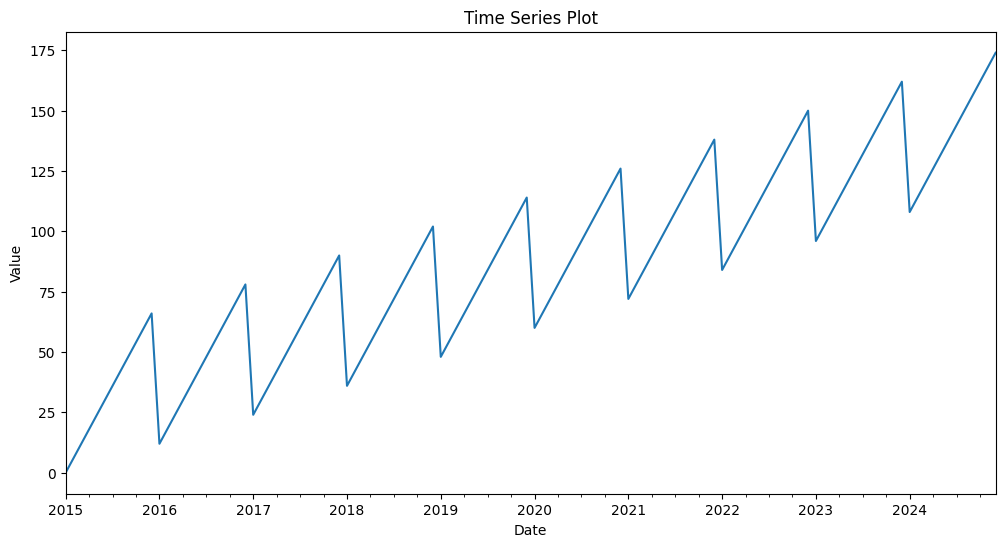

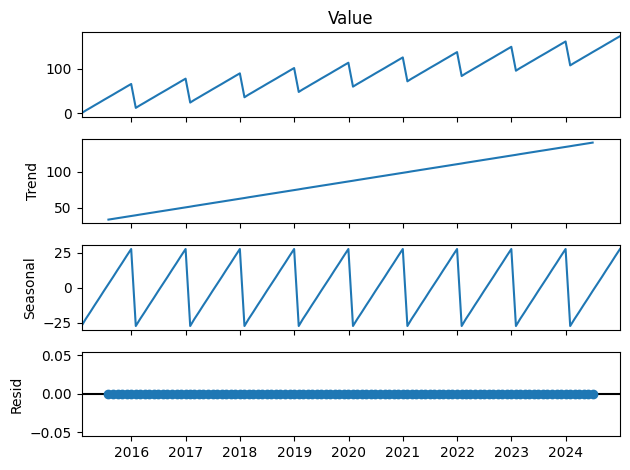

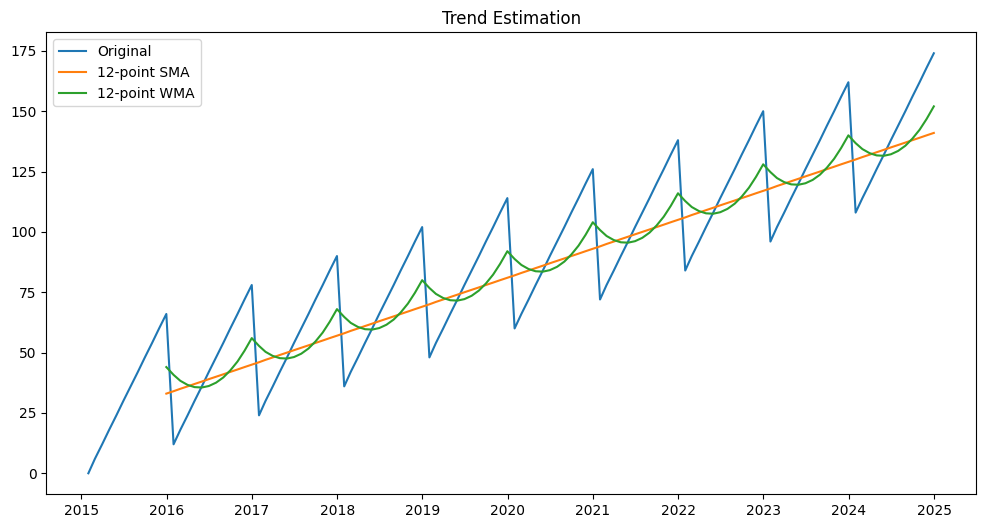

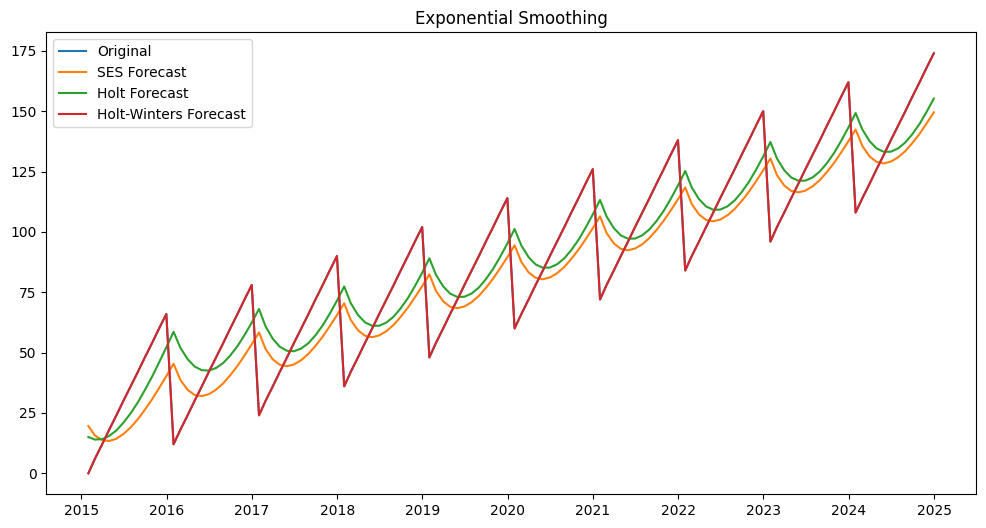

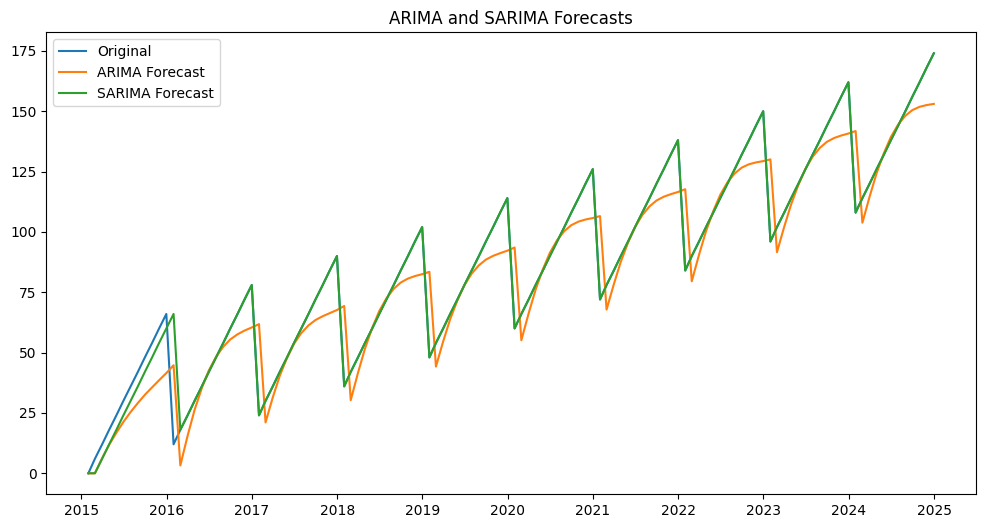

SES - MAE: 16.58453350674286, RMSE: 18.733427272297824
Holt - MAE: 15.608552422532208, RMSE: 18.738485310985133
Holt-Winters - MAE: 1.0448024530222236e-05, RMSE: 1.3550815886259792e-05
ARIMA - MAE: 9.560072686742668, RMSE: 13.55615471061334
SARIMA - MAE: 0.9661016949152542, RMSE: 5.269033295055818


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Generate and load sample dataset
date_range = pd.date_range(start="2015-01-01", end="2024-12-31", freq="M")
values = [i + (5 * (i % 12)) for i in range(len(date_range))]  # Adding some seasonal pattern
sample_data = pd.DataFrame({
    "Date": date_range,
    "Value": values
})
file_path = "sample_time_series.csv"
sample_data.to_csv(file_path, index=False)

# Load the dataset
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
time_series = data['Value']  # Replace 'Value' with your column name

# 1. Data Exploration
plt.figure(figsize=(12, 6))
time_series.plot()
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# 2. Time Series Decomposition
decomposition = seasonal_decompose(time_series, model='additive', period=12)  # Adjust period if needed
decomposition.plot()
plt.show()

# 3. Trend Estimation
# Simple Moving Average
window = 12
sma = time_series.rolling(window=window).mean()

# Weighted Moving Average
weights = np.arange(1, window + 1)
wma = time_series.rolling(window=window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original')
plt.plot(sma, label=f'{window}-point SMA')
plt.plot(wma, label=f'{window}-point WMA')
plt.legend()
plt.title('Trend Estimation')
plt.show()

# 4. Exponential Smoothing
# Single Exponential Smoothing
ses_model = ExponentialSmoothing(time_series, trend=None, seasonal=None).fit(smoothing_level=0.2)
ses_forecast = ses_model.fittedvalues

# Double Exponential Smoothing (Holt's Linear Trend)
holt_model = ExponentialSmoothing(time_series, trend='add', seasonal=None).fit(smoothing_level=0.2, smoothing_slope=0.1)
holt_forecast = holt_model.fittedvalues

# Triple Exponential Smoothing (Holt-Winters)
hw_model = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original')
plt.plot(ses_forecast, label='SES Forecast')
plt.plot(holt_forecast, label='Holt Forecast')
plt.plot(hw_forecast, label='Holt-Winters Forecast')
plt.legend()
plt.title('Exponential Smoothing')
plt.show()

# 5. Forecasting with AR, ARIMA, SARIMA
# ARIMA Model
arima_model = ARIMA(time_series, order=(2, 1, 2))  # Replace with tuned (p, d, q)
arima_result = arima_model.fit()
arima_forecast = arima_result.fittedvalues

# SARIMA Model
sarima_model = SARIMAX(time_series, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))  # Replace with tuned (P, D, Q, s)
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title('ARIMA and SARIMA Forecasts')
plt.show()

# 6. Model Evaluation
# Metrics: MAE and RMSE
def evaluate_model(true_values, predictions, model_name):
    mae = mean_absolute_error(true_values, predictions)
    rmse = math.sqrt(mean_squared_error(true_values, predictions))
    print(f'{model_name} - MAE: {mae}, RMSE: {rmse}')

# Evaluate all models
evaluate_model(time_series[1:], ses_forecast[1:], 'SES')
evaluate_model(time_series[1:], holt_forecast[1:], 'Holt')
evaluate_model(time_series, hw_forecast, 'Holt-Winters')
evaluate_model(time_series[2:], arima_forecast[2:], 'ARIMA')
evaluate_model(time_series[2:], sarima_forecast[2:], 'SARIMA')
